<a href="https://colab.research.google.com/github/AndresUsecheFH/Python-Colab/blob/main/TallerEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Datos**

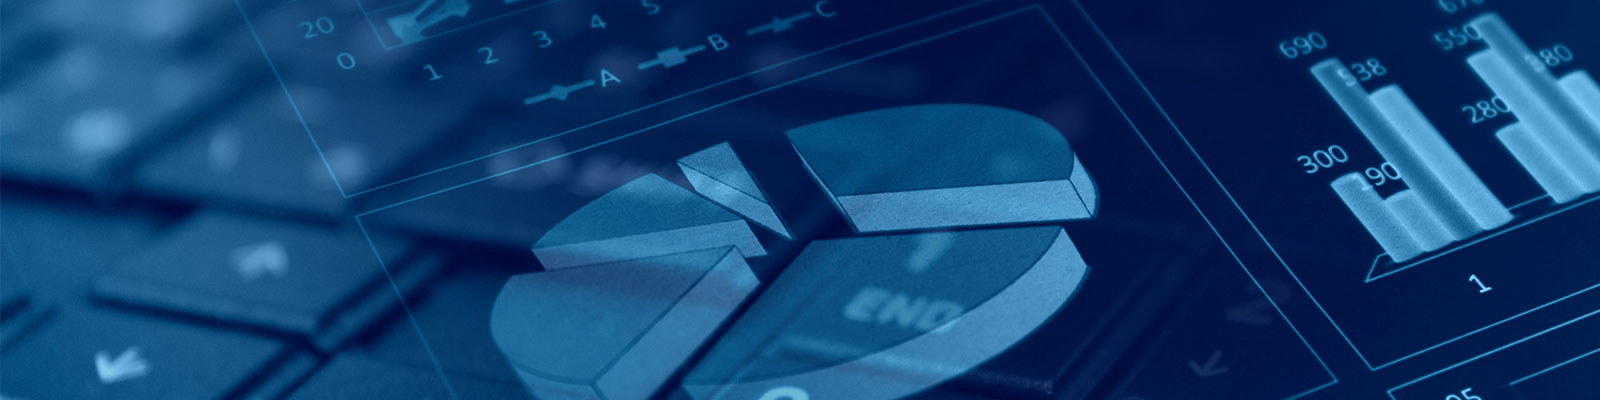

El objetivo de esta clase es dar una introducción al análisis exploratorio de datos (EDA) con Python, Pandas y Jupyter. Vamos a empezar con el proceso de cargar un archivo CSV, inspeccionarlo y limpiar los datos. Luego, analizaremos los datos y extraeremos algunas ideas sobre los mismos.

### La clase sigue la siguiente estructura:

1. Introducción a Python, Pandas y Jupyter

1. Ejercicio para conocer Jupyter

1. Cargar los datos
  - Importar librerías
  - Cargar el conjunto de datos
  
1. Descripción general de los datos
  - Estadística descriptiva
  - Valores faltantes
  
1. Análisis Exploratorio de los Datos (EDA)
  - Crear una lista de columnas por tipo de dato.
  - Revisar la distribución de la clase objetivo 🎯
  - Revisar la distribución de cada característica
  - Revisar cómo las diferentes categorías numéricas están relacionadas con la clase objetivo
  
1. Preparación de los datos
  - Limpieza de los datos, valores faltantes

1. Más sobre visualización de datos en Python

## **1. Introducción a Python, Pandas y Jupyter**

### **Conozcamos algunas de las librerías de [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) más populares en análisis de datos**

- **Pandas** es una librería de Python para el **análisis y manipulación de datos**. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y categóricas, y series de tiempo.

- **Matplotlib** es una librería de Python para generar **gráficas en 2D**. Pyplot es una colección de funciones de estilo de comando en Matplotlib que hacen que Matplotlib funcione como MATLAB. Si bien usamos principalmente Seaborn, a veces recurrimos al uso de funciones de Pyplot para ciertos aspectos del trazado.

- **Seaborn** es una librería de Python para la **visualización de datos** basada en matplotlib. Es como una versión más agradable de Pyplot.


📝 Puedes usar el código de Pandas en un script python normal. Acá combinamos Jupyter + Pandas porque los **notebooks** son una excelente manera de ver inmediatamente la salida del código.




### **¿Qué es Jupyter (y el ecosistema de Jupyter...)?**

- **IPython** es un shell interactivo de Python (simplemente escribe "ipython" para iniciarlo).
- **Jupyter** es una librería de Python que proporciona una interfaz de usuario basada en la web sobre ipython para crear blocs de notas con código y salida.
- **JupyterLab** proporciona algunas características adicionales además de Jupyter, por ejemplo, un navegador de archivos.

## **2. Ejercicio para conocer Jupyter**


### Los cuadernos (notebooks) son básicamente terminales ipython interactivos, a menudo mezclados con texto escrito en [markdown](https://www.markdownguide.org/basic-syntax/):
- Cada campo de entrada que ves se llama **celda**
- Las celdas pueden ser **código o texto en markdown**
- Puedes ejecutar cualquier tipo de código Python y en R
- **Las variables persisten** entre las celdas
- Al cuaderno **no le importa el orden de las celdas**, solo el orden de ejecución para recordar variables. Sin embargo, "ejecutar todo" ejecuta sus celdas de arriba a abajo.


### Los cuadernos tienen **dos modos**: a) editar las celdas y b) navegar por el cuaderno (modo comando):
- Puedes **navegar** por el cuaderno en modo de comando haciendo clic en las celdas o usando las teclas de flecha

- Según el entorno que esté utilizando (Jupyter notebook, Jupyter lab, Google Colab...), habrá una **señal visual** diferente (por ejemplo, una línea de color) para indicar el modo en que se encuentra una celda.

- Para **editar una celda**, puede presionar **Entrar** o hacer doble clic en ella.

- Para **ejecutar** el contenido de la celda, presione Shift+Enter para ejecutar la celda

- Para **salir del modo de edición** y volver al modo de navegación, presione la **tecla Escape**

### [Algunos atajos de teclado útiles](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.02-Shell-Keyboard-Shortcuts.ipynb):
- El **tipo predeterminado para una celda es código**.
- Presione *ctrl + m + a* en el modo de comando para crear una nueva celda *encima* de la actual
- Presiona *ctrl + m + b* en modo comando para crear una nueva celda *debajo* de la actual
- *Tab* métodos de autocompletado (como en IPython)
- *Shift+Tab* muestra la cadena de documentación para la función exterior de la línea en la que se encuentra el cursor
- Presiona *ctrl + m + d* para borrar una celda.
- *Cmd + z* deshace operaciones en la celda resaltada, *ctrl + m + z* deshace operaciones de celda en el cuaderno (por ejemplo, eliminar una celda)

In [ ]:
# Ejemplo
print('Hello everyone!')

Hello everyone!


In [ ]:
# Ejemplo
import math
math.ceil(4.3)

5

👩🏻‍💻 🧑🏻‍💻 **DIY** 👩🏻‍💻 🧑🏻‍💻

Intenta usar solo su teclado y atajos para estas dos tareas:
- Crea una nueva celda *markdown* debajo de esta, escribe algunas líneas y formatéalas para que parezcan un encabezado y viñetas.
- Crea una nueva celda *código* arriba de la primera, importa tu función de Python favorita, consulta la de documentación y ejecute el código (por ejemplo, `os.getcwd()`, `print()`, etc.)

## **3. Cargar los datos**
  - Importar librerías
  - Cargar el conjunto de datos

### 3.1. Importar librerías

In [ ]:
# Manipulación de datos
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas
import math

# Ajustar opciones
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

# Drive
from google.colab import drive

### 3.2. Cargar el conjunto de datos

Cargar el conjunto de datos usando `pd.read_csv()`

Los datos provienen de [Kaggle](https://www.kaggle.com/aakash50897/churn-modellingcsv), una comunidad en línea de científicos de datos y profesionales del Machine Learning.

## Dataframe
* Un **dataframe** es una estructura de datos etiquetada en 2 dimensiones con columnas de tipos de datos potencialmente diferentes. Puedes pensar en ello como una hoja de cálculo o una tabla SQL, o un diccionario de objetos Series. Generalmente es el objeto de Pandas más utilizado.

* Pandas toma prestado el concepto de DataFrame del lenguaje de programación estadístico R.

* Hay muchas formas diferentes de leer datos en un **dataframe**, desde listas, diccionarios, CSV, bases de datos ...

¡En este ejemplo, estamos cargando datos de un archivo CSV!


In [ ]:
# Acceder a los archivos de drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer los datos desde un archivo csv
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
# Ver las primeras 5 líneas de los datos
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


## **4. Descripción general de los datos**

En esta sección podrás:
- Revisar los datos de forma general
- Obtener las estadísticas descriptivas de los datos
- Obtener la información sobre los valores faltantes en los datos

### 4.1. Información general de los datos

Usaremos algunas de las funciones predefinidas para darle una primera revisión a los datos.

In [ ]:
# Información básica de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Comentario sobre la informacion del df



In [ ]:
# Muestra aleatoria de los datos
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4283,4284,15750769,Padovano,725,France,Male,35,7,75915.75,1,1,0,150507.43,0
2379,2380,15625904,Wang,624,France,Male,26,9,74681.90,2,0,0,31231.35,0
3656,3657,15759284,Yeh,750,France,Female,37,6,0.00,1,1,1,117948.00,1


👩🏻‍💻 🧑🏻‍💻 **DIY** 👩🏻‍💻 🧑🏻‍💻

Explora el conjunto de datos usando las siguientes funciones

```
len(df)
df.shape
df.dtypes
df.columns
```

### 4.2. Estadística Descriptiva

Como su nombre lo indica, la estadística descriptiva describe los datos numéricos en el dataset. Nos brinda información sobre:
- Media, conteo, cuartiles
- Min, máx
- etc

In [ ]:
# Dimensión de los datos
df.shape

(10000, 14)

In [ ]:
# Resumen estadístico de los datos
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Resumen estadístico de los datos
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### 4.3 Valores faltantes/perdidos

Obtener información sobre los valores que faltan en el dataframe.

In [ ]:
# Missing values for every column
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **5. Análisis Exploratorio de los Datos (EDA)**

El análisis exploratorio de datos es un enfoque para analizar o investigar conjuntos de datos para descubrir patrones y ver si alguna de las variables puede ser útil para predecir las variables *y*. En esta etapa los métodos visuales se utilizan a menudo para resumir los datos.

Principalmente EDA es para ver lo que los datos pueden decirnos más allá de las tareas formales de modelado o prueba de hipótesis.

En esta sección veremos cómo:

- Crear una lista de columnas por tipo de datos
- Comprobar la distribución de la clase objetivo 🎯
- Comprobar la distribución de cada característica
- Comprobar cómo se relacionan las diferentes características numéricas a la clase de objetivo 🎯

### 5.1. Extraer tipos de datos de las columnas

Una buena práctica es entender el tipo de datos que contiene cada columna y separlarlas desde el inicio dependiendo de si el tipo de dato es numérico o categoríco. Es mejor obtener la lista de columnas por tipos de datos en el propio inicio.

Esta estretegia permite que no tengas que escribir manualmente el nombre de las columnas mientras realizas ciertas operaciones.

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4409,4410,15781598,Middleton,756,Germany,Male,41,6,149049.92,1,0,1,50422.36,1
8991,8992,15698902,McIntyre,547,Germany,Female,42,1,142703.40,1,1,0,86207.49,1
4028,4029,15764335,Caldwell,463,Germany,Female,41,8,123151.51,2,1,0,70127.93,0
6498,6499,15770405,Warlow-Davies,613,France,Female,27,5,125167.74,1,1,0,199104.52,0
4847,4848,15624596,Trentini,534,France,Female,23,5,104822.45,1,0,1,160176.47,0


In [ ]:
df['Geography'].nunique()

3

In [ ]:
# Revisar los valores únicos de una columna
df['HasCrCard'].unique()

array([1, 0])

In [ ]:
# Revisar los valores únicos de una columna
df['IsActiveMember'].unique()

array([1, 0])

In [ ]:
# Categorical columns
input_cat_columns = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical columns
input_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# Remover una columna que no nos bronda información relevane para este análisis
col_remove = 'RowNumber'
df = df.drop(col_remove, axis = 1)

In [ ]:
# Col datatype selection
input_datatype_selection = 'auto'  # Usa Auto si no quieres proporcionar nombres de columna por tipo de datos, de lo contrario usa 'manual'

In [ ]:
# Obtener la lista de columnas numéricas y categóricas según la entrada
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)

else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)

    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
Categorical Columns :  ['Surname', 'Geography', 'Gender']
Numerical Columns :  ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


### 5.2 Revisar la distribución de la clase objetivo 🎯

Debes verificar la distribución de la clase objetivo 🎯, ver cuántas categorías hay y si está equilibrada o no.

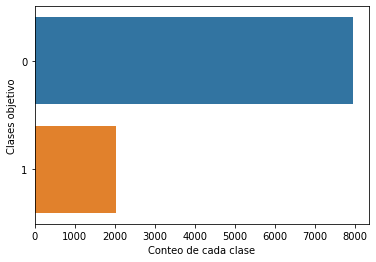

In [ ]:
# Revisar la distribución de las clases
sns.countplot(y=df['Exited'] ,data=df)
plt.xlabel("Conteo de cada clase")
plt.ylabel("Clases objetivo")
plt.show()

### 5.3. Revisar la distribución de cada una de las características/feature

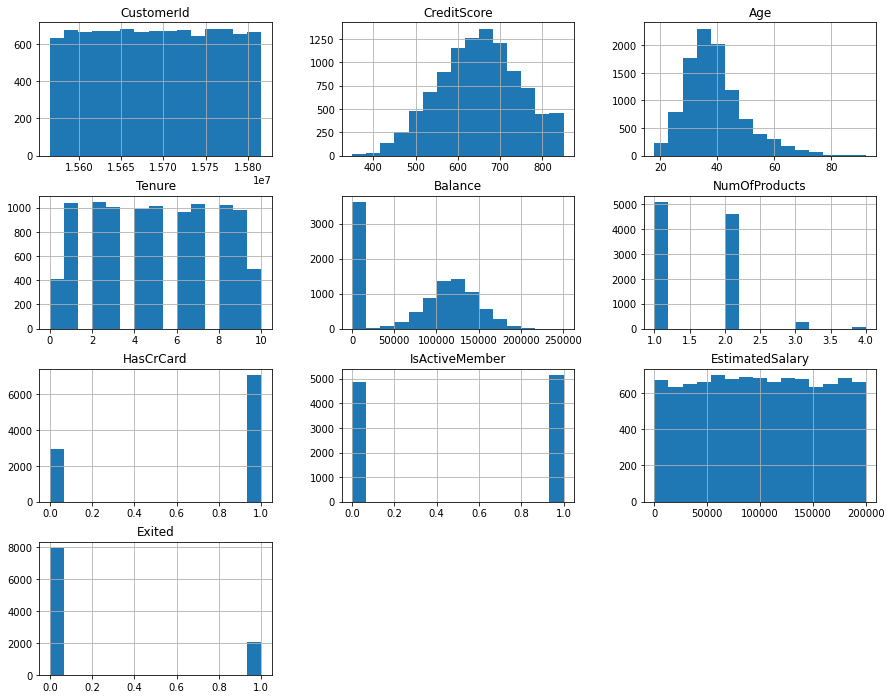

In [ ]:
# Revisar la distribución de las características
df.hist(figsize=(15,12),bins = 15)
plt.title("Distribución de las características")
plt.show()

### 5.4. Revisar cómo las diferentes características numéricas están relacionadas con las clases objetivo 🎯

In [ ]:
# Establecer el número de columnas y filas en la gráfica
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

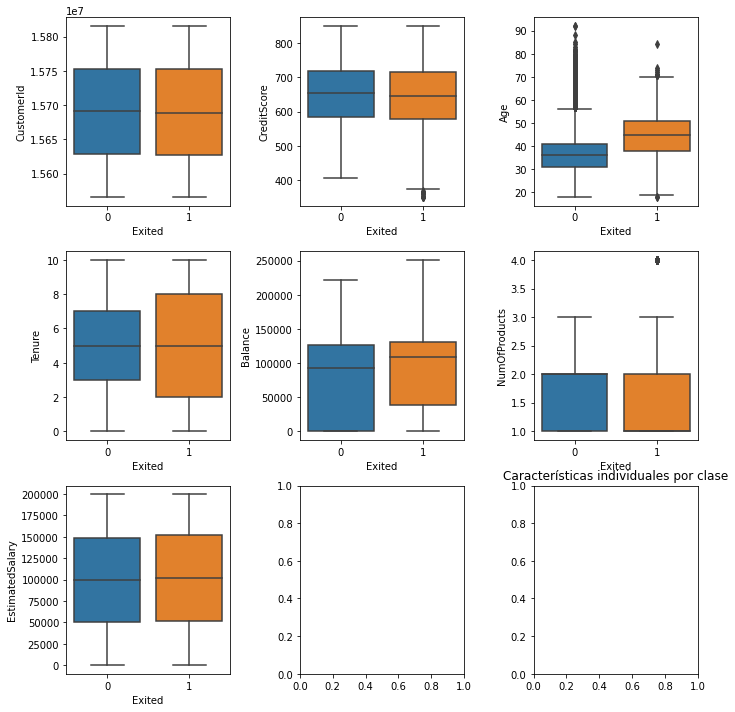

In [ ]:
# Revisar la distribución de la variable y respecto a cada variable x
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(10,10))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Exited'], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Características individuales por clase")
plt.show()

## **6. Preparación de los Datos**

### 6.1. Limpieza de datos

En Machine Learning se trabaja con la idea de basura dentro - basura fuera. Si alimenta el modelo con datos sucios, los resultados no serán buenos. Por lo tanto, es muy importante limpiar los datos antes de entrenar el modelo.


Hay varias formas de manejar los valores faltantes. Algunas de las formas son:

- Eliminar las filas con valores faltantes
- Impute los valores faltantes con media, mediana, modo, categoría más frecuente, categoría desconocida, etc...

In [ ]:
# Seleccionar el nombre del método para manejar valores faltantes
input_treat_missing_value = 'drop' # Opciones: 'drop','inpute' and 'ignore'

In [ ]:
# Usar el método para manejar los valores faltantes de acuerdo a la selección anterior

if input_treat_missing_value == 'drop':

    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute':

    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")

elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

(10000, 13)


In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **7. Más  sobre Visualización de Datos en Python**

A continuación encontrarás más notebooks de Jupyter que te permitirán conocer más sobre visualización de datos con Python



*   [Charts in Colaboratory](https://colab.research.google.com/drive/1b09i78V6RWQ8B0rp3qE421nrtJPbAXDT?usp=sharing)
*   [Iniciando la Visualización con Python: Matplotlib y Seaborn](https://colab.research.google.com/drive/16ISR_3B3R-S7X7bETJLRJ5na2gkMZzkC?usp=sharing)

